In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

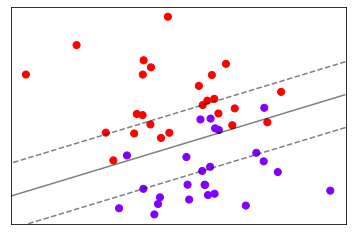

In [2]:
x,y  = make_blobs(n_samples=50,centers=2,random_state=5,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])


ax = plt.gca()
xlim  =  ax.get_xlim()
ylim  = ax.get_ylim()
axisx  =  np.linspace(xlim[0],xlim[1],40)
axisy  =  np.linspace(ylim[0],ylim[1],40)
axisy,axisx  =  np.meshgrid(axisy,axisx)
xy= np.vstack([axisx.ravel(),axisy.ravel()]).T

clf  = SVC(kernel  =  "linear").fit(x,y)
p  = clf.decision_function(xy).reshape(axisx.shape)
ax.contour(axisx,axisy,p,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [3]:
from sklearn.datasets  import  load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime


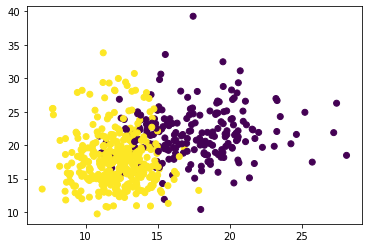

In [4]:
data = load_breast_cancer()
x = data.data
y = data.target
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [15]:
import pandas as pd
pdata = pd.DataFrame(x)
pdata.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [14]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=99)
kernels = ["linear","poly","rbf","sigmoid"]
for kernel in kernels:
    time0 = time()
    clf =  SVC(kernel = kernel,gamma="auto",degree=1,cache_size=2000).fit(xtrain,ytrain)
    print("accuracy under kernel %s is %f" % (kernel,clf.score(xtest,ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

accuracy under kernel linear is 0.976608
00:00:005014
accuracy under kernel poly is 0.976608
00:00:010087
accuracy under kernel rbf is 0.970760
00:00:010057
accuracy under kernel sigmoid is 0.953216
00:00:005037


0.9707602339181286 0.0339322177189533


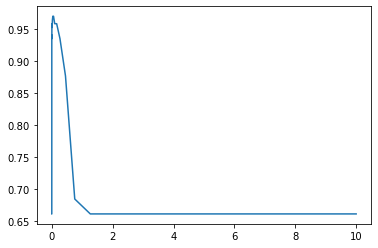

In [18]:
score=[]
gammarange= np.logspace(-10,1,50)
for i in gammarange:
    clf = SVC(kernel="rbf",gamma=i,cache_size=2000).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
print(max(score),gammarange[score.index(max(score))])
plt.plot(gammarange,score)
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0= time()
gammarange = np.logspace(-10,1,20)
coef0range = np.linspace(0,5,10)
paramgrid = dict(gamma= gammarange, coef0=coef0range)

cv = StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=222)
grid = GridSearchCV(SVC(kernel="poly",degree=1,cache_size=2000),param_grid=paramgrid,cv=cv)
grid.fit(x,y)
print("the test param are %s with score %0.5f" %(grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

TypeError: %o format: an integer is required, not numpy.float64